In [6]:
import pandas as pd


In [36]:
d=pd.read_csv('pima-indians-diabetes.csv', header=None)

In [37]:
d.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## How many NA/missing/0 values do we have?

#### Sometimes 0 can be a missing value (based on the context of the data)

### Compute/total how many 0s are there from columns 1-8

In [38]:
print((d[[1,2,3,4,5,6,7]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
6      0
7      0
dtype: int64


In [15]:
import numpy as np

In [39]:
# mark zero values as missing or NaN
d[[1,2,3,4,5]] = d[[1,2,3,4,5]].replace(0, np.NaN)

### Visualize Missing Values

In [ ]:
import missingno as msno
##https://anaconda.org/conda-forge/missingno
import matplotlib
%matplotlib inline

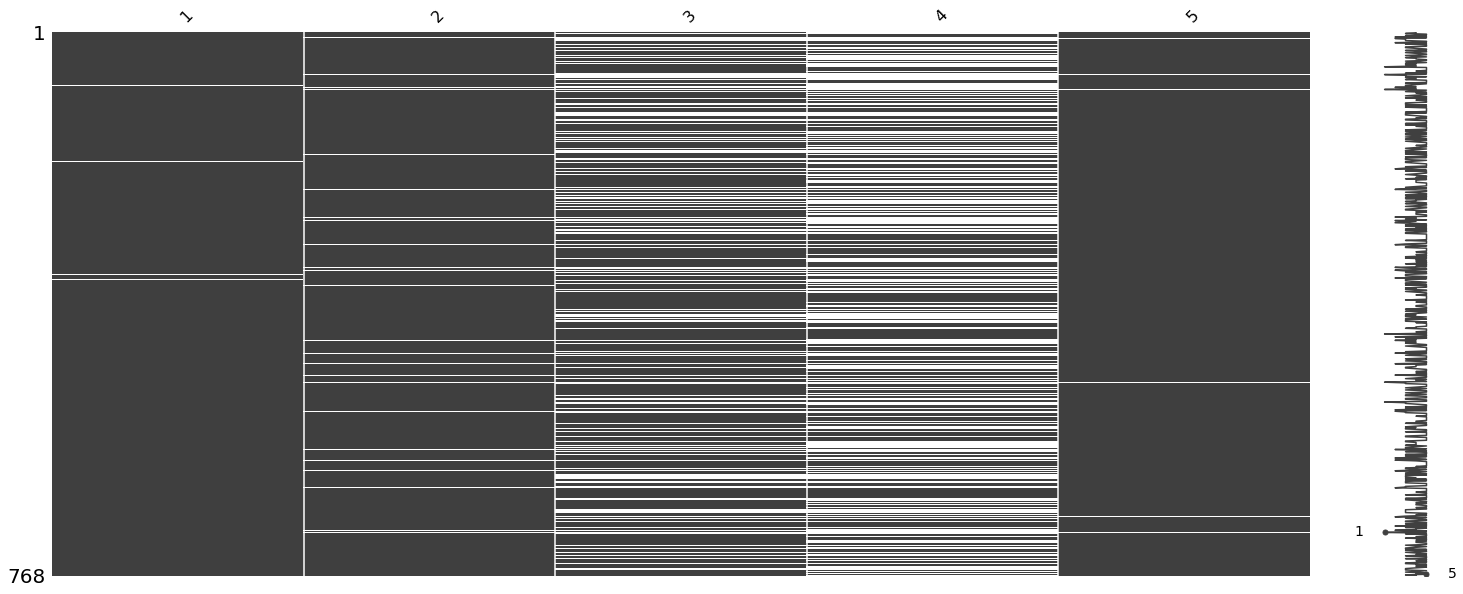

In [40]:
missingdata_df = d.columns[d.isnull().any()].tolist()
msno.matrix(d[missingdata_df])

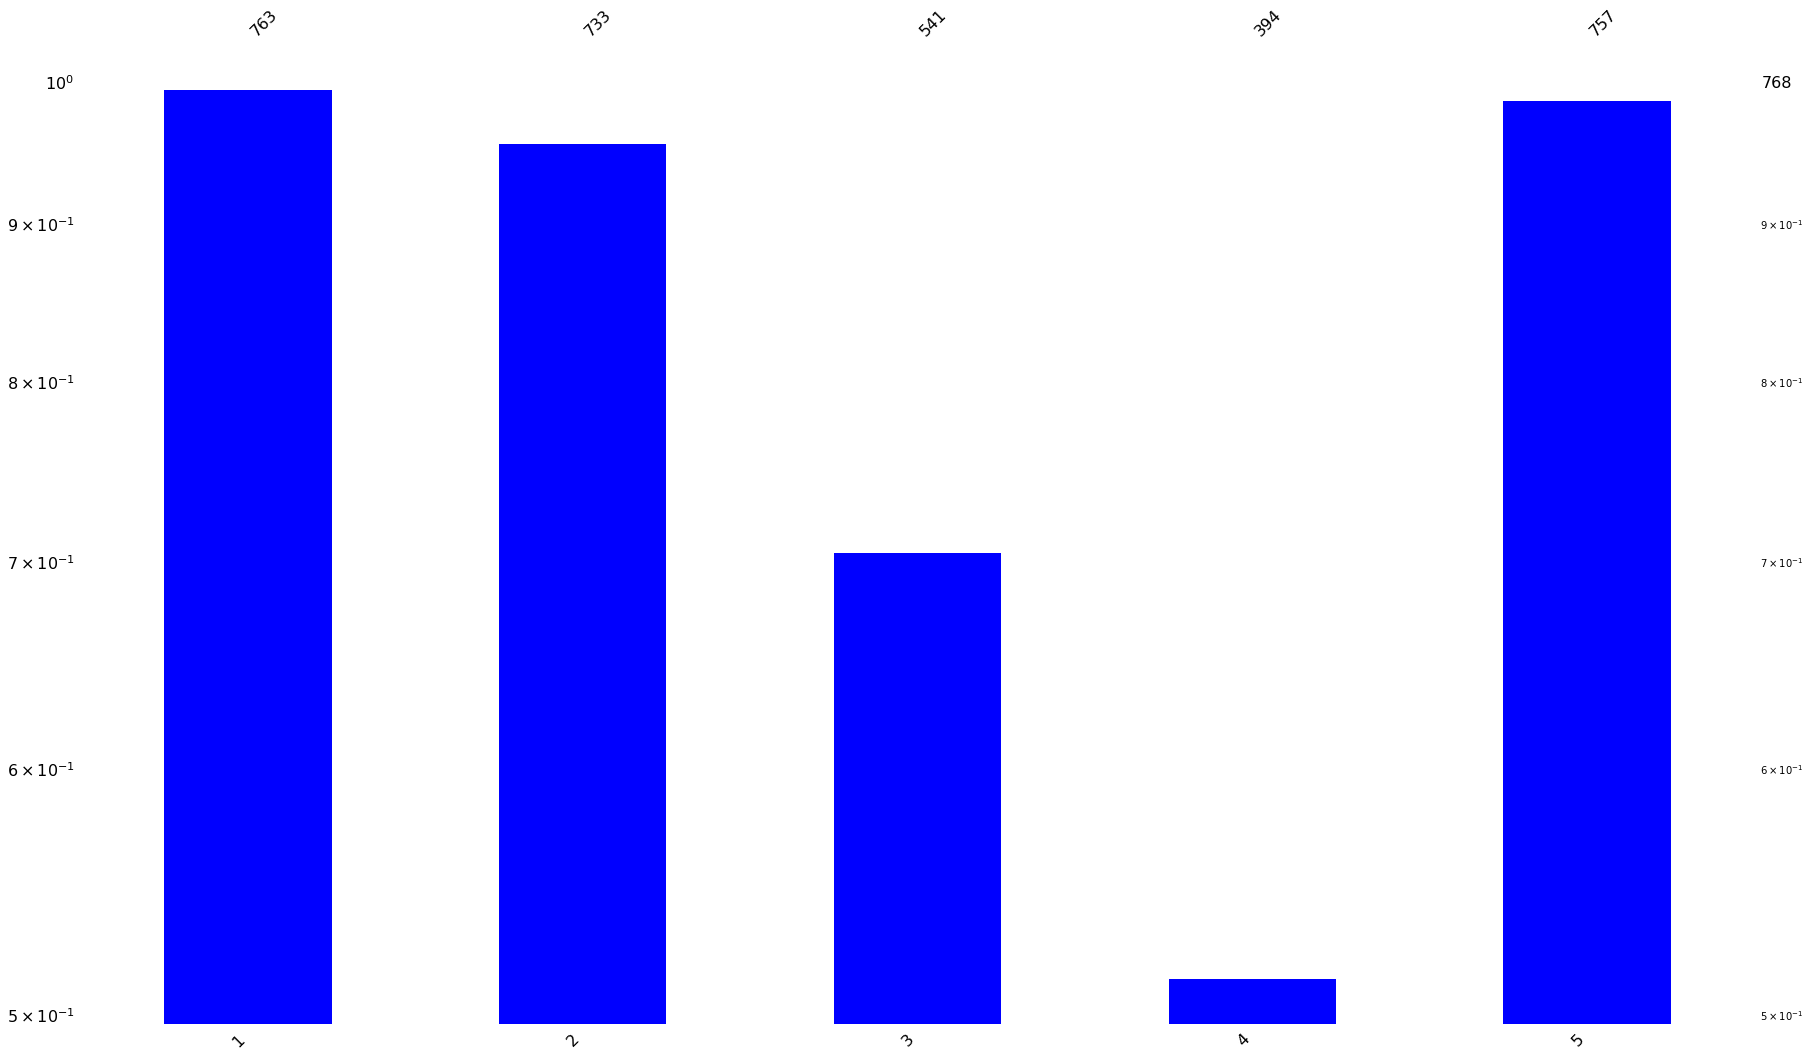

In [41]:
msno.bar(d[missingdata_df], color="blue", log=True, figsize=(30,18))

## Data Imputation

In [42]:
# fill missing values with mean column values
d.fillna(d.mean(), inplace=True)

In [43]:
print(d.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Use in-built imputation techniques

In [13]:
from sklearn.preprocessing import Imputer

In [28]:
values = d.values
imputer = Imputer() ## call the function

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())


0


In [ ]:
### Customize imputer 

In [44]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
transformed_values2 = imp.fit_transform(values)

In [35]:
print(np.isnan(transformed_values2).sum())

0
